# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [1]:
# Add code here 🔧

## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



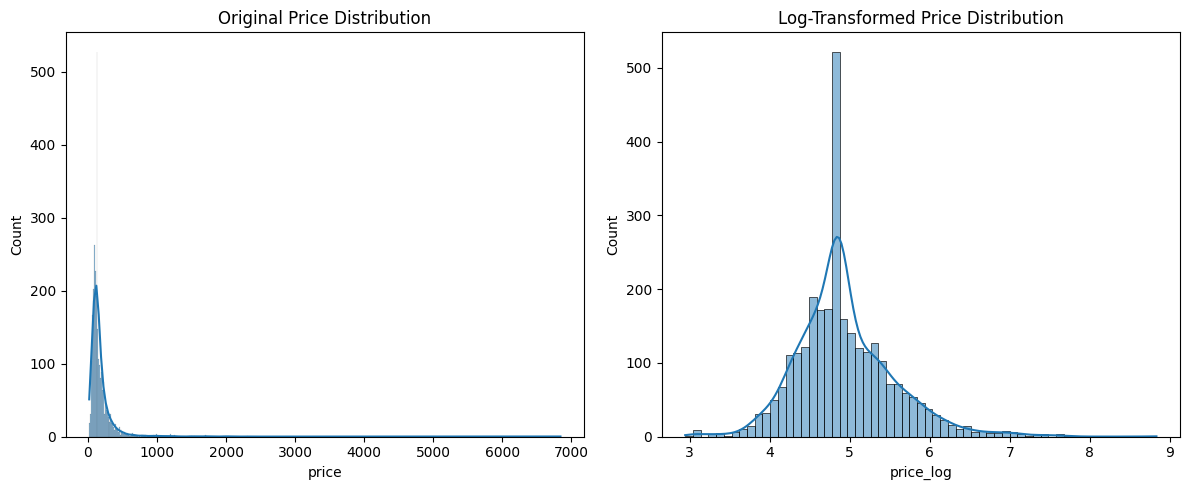

In [3]:
# Add code here 🔧
# Plot histogram of original 'price'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Original Price Distribution')

# Apply log transformation
df['price_log'] = np.log1p(df['price']) # Using log1p to handle potential zero values

# Plot histogram of log-transformed 'price'
plt.subplot(1, 2, 2)
sns.histplot(df['price_log'], kde=True)
plt.title('Log-Transformed Price Distribution')

plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. I examined the 'price' column.

2. I used a log transformation (np.log1p) because the original price distribution was highly skewed to the right, with a few very high values. The log transformation compresses the range of these high values, making the distribution more symmetrical and closer to a normal distribution. This is helpful for many statistical models that assume normally distributed data.

3. The transformed version of the 'price' column is more usable for analysis because it reduces the impact of outliers and makes the data more amenable to statistical modeling and comparisons. For stakeholders, visualizing the log-transformed price can provide a clearer picture of the typical price range, as the extreme values no longer dominate the histogram.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale


# Z-score scale



,minimum_nights,minimum_nights_scaled,number_of_reviews,number_of_reviews_scaled
0,1,0.000000,454,2.223040
1,2,0.001372,87,-0.153893
2,30,0.039781,67,-0.283426
3,7,0.008230,53,-0.374099
4,1,0.000000,35,-0.490679


I scaled the 'minimum_nights' column using Min-Max scaling and the 'number_of_reviews' column using Z-score normalization (Standardization).
These scaled values are more useful than the originals when:
Building machine learning models: Many algorithms perform better when features are on a similar scale.
Comparing features with different units or ranges: Scaling brings them to a comparable range.
Visualizing relationships between variables with vastly different scales.
Data Scientists/Analysts at Airbnb would benefit greatly from this transformation. They could use the scaled values in machine learning models to predict booking rates, optimize pricing, or identify factors influencing host success. For example, when building a pricing model, using scaled values for features like 'minimum_nights' and 'number_of_reviews' would prevent features with larger numerical ranges from disproportionately influencing the model.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [5]:
# Add code here 🔧

,count
review_category,
Low,977
High,958
Medium,941


### ✍️ Your Response: 🔧
1. I grouped the **'number_of_reviews'** column into **three categories**: "Low", "Medium", and "High".


2. Someone might prefer this grouped view over raw numbers because it simplifies the data and makes it easier to understand at a glance. Instead of looking at a wide range of review counts, stakeholders can quickly see which listings fall into general categories of review activity.

3. This would help the marketing team at Airbnb because it allows them to segment hosts by how much review volume they are getting and improve target market campaigns by providing feedback to hosts with low review scores and giving them tips to be better.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [6]:
# Add code here 🔧


,price,minimum_nights,price_per_night,is_long_term_stay
0,95.0,1,95.000000,0
1,44.0,2,22.000000,0
2,90.0,30,3.000000,1
3,61.0,7,8.714286,0
4,200.0,1,200.000000,0


### ✍️ Your Response: 🔧 🔧
1. I created two new columns:

price_per_night: This is calculated by dividing the listing's price by its minimum_nights.
is_long_term_stay: This is a binary flag (1 or 0) indicating whether the minimum_nights for a listing is 30 or more.

2. Hosts can use them to understand how their price per night compares to others and marketing managers can use it for target promotions for extended stays or good deals on price per night.

3. For Hosts: By looking at price_per_night, hosts can assess if their pricing is competitive for the minimum stay they require. The is_long_term_stay flag helps them understand if their listing is positioned for shorter or longer bookings, which can inform their pricing strategy and amenities offered.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



,room_type,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Entire home/apt,True,False,False,False
1,Private room,False,False,True,False
2,Entire home/apt,True,False,False,False
3,Private room,False,False,True,False
4,Entire home/apt,True,False,False,False


### ✍️ Your Response: 🔧
1. I encoded the 'room_type' column because it is a categorical variable that needs to be converted into a numerical format for use in most machine learning models.
2. I used one-hot encoding. This method is appropriate because 'room_type' is a nominal categorical variable, meaning there is no inherent order or ranking between the different room types.
3. This transformation can significantly help a pricing model, dashboard, or business report:
Pricing Model: Machine learning models typically require numerical input. One-hot encoded 'room_type' columns allow the model to incorporate the impact of different room types on price prediction. For example, a model can learn that "Entire home/apt" listings generally have higher prices than "Private room" listings.
Dashboard/Business Report: While you might not display the raw one-hot encoded columns directly, the underlying data can be used to power visualizations and reports. For instance, you could create charts showing the average price or booking rate for each room type, or filter reports to focus on specific room types. This provides actionable insights for hosts (on how their room type affects performance) and for Airbnb (on market trends for different room types).

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The log transformation of the 'price' column felt most important. Dealing with highly skewed data like price is a common challenge in real-world datasets, and understanding how transformations like the log can normalize the distribution is crucial for building robust models and performing accurate analysis.

2. Host: The price_per_night and is_long_term_stay features would be most useful to a host. They provide direct, actionable insights into their pricing strategy and the type of stays their listing attracts compared to others. This helps them optimize their listing for their desired target audience and revenue goals.

3. If I were building a tool or dashboard, I would next focus on geospatial analysis and visualization. I would use the latitude and longitude data, potentially combined with neighborhood information, to create interactive maps.
4. This relates to my customized learning outcome since I will be able to organize evaluations of companies data or help out clients with data visualization so they can maximize their profits with their Airbnb.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_07_LastnameFirstname.ipynb"